In [60]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the dataset
df = pd.read_pickle('./data_eco2/eco2mix-national-cons-def-reduit.pkl')


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 194330 entries, 2012-01-01 01:00:00+02:00 to 2023-02-01 00:30:00+02:00
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   nature         194330 non-null  object 
 1   consommation   194330 non-null  float64
 2   fioul          194330 non-null  int32  
 3   charbon        194330 non-null  int32  
 4   gaz            194330 non-null  int32  
 5   nucleaire      194330 non-null  int32  
 6   eolien         194330 non-null  int32  
 7   solaire        194330 non-null  int32  
 8   hydraulique    194330 non-null  int32  
 9   pompage        194330 non-null  int32  
 10  bioenergies    194330 non-null  int32  
 11  ech_physiques  194330 non-null  float64
 12  taux_co2       194330 non-null  float64
dtypes: float64(3), int32(9), object(1)
memory usage: 14.1+ MB


In [62]:
df.nature

date_heure_gmt2
2012-01-01 01:00:00+02:00    Données définitives
2012-01-01 01:30:00+02:00    Données définitives
2012-01-01 02:00:00+02:00    Données définitives
2012-01-01 02:30:00+02:00    Données définitives
2012-01-01 03:00:00+02:00    Données définitives
                                    ...         
2023-01-31 22:30:00+02:00    Données consolidées
2023-01-31 23:00:00+02:00    Données consolidées
2023-01-31 23:30:00+02:00    Données consolidées
2023-02-01 00:00:00+02:00    Données consolidées
2023-02-01 00:30:00+02:00    Données consolidées
Name: nature, Length: 194330, dtype: object

#Dans un premier temps on travaillera selement sur les données définitives

In [63]:
df=df[df['nature'] == 'Données définitives']
df

,nature,consommation,fioul,charbon,gaz,nucleaire,eolien,solaire,hydraulique,pompage,bioenergies,ech_physiques,taux_co2
date_heure_gmt2,,,,,,,,,,,,,
2012-01-01 01:00:00+02:00,Données définitives,58315.0,492,25,3816,52697,3588,0,7922,-1139,719,-9806.0,33.0
2012-01-01 01:30:00+02:00,Données définitives,58315.0,492,25,3816,52697,3588,0,7922,-1139,719,-9806.0,33.0
2012-01-01 02:00:00+02:00,Données définitives,56231.0,492,25,3834,51747,3536,0,7598,-1730,721,-9993.0,34.0
2012-01-01 02:30:00+02:00,Données définitives,56075.0,491,25,3832,51950,3526,0,7299,-2134,722,-9636.0,35.0
2012-01-01 03:00:00+02:00,Données définitives,55532.0,492,25,3839,51625,3535,0,7159,-2449,719,-9412.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 22:30:00+02:00,Données définitives,45855.0,73,24,2510,26460,16286,1,7070,-2398,1290,-5396.0,30.0
2022-12-31 23:00:00+02:00,Données définitives,45083.0,77,23,2569,26374,16093,1,6891,-2397,1289,-5777.0,31.0
2022-12-31 23:30:00+02:00,Données définitives,45796.0,75,23,2542,25815,15795,1,6756,-2414,1290,-4026.0,31.0


In [64]:
### Consommation , production et emmissions de CO2 par semaine

In [65]:
df_resample=df.resample('W').sum(numeric_only=True)
df_resample

,consommation,fioul,charbon,gaz,nucleaire,eolien,solaire,hydraulique,pompage,bioenergies,ech_physiques,taux_co2
date_heure_gmt2,,,,,,,,,,,,
2012-01-01 00:00:00+02:00,2359381.0,22664,733,174131,2060039,180577,6255,350285,-85311,32062,-382047.0,1734.0
2012-01-08 00:00:00+02:00,21916542.0,173342,37914,1341721,18825644,1193011,43431,3196659,-381898,231948,-2745248.0,11148.0
2012-01-15 00:00:00+02:00,23178076.0,165771,314873,2007639,19657352,355117,65893,3017330,-250988,237487,-2392427.0,17190.0
2012-01-22 00:00:00+02:00,23813896.0,229747,620112,1968970,19644801,989287,56135,2807609,-236471,232779,-2499108.0,20484.0
2012-01-29 00:00:00+02:00,22635035.0,252825,297976,1956752,19550763,378763,51137,3038839,-217944,236875,-2910969.0,17587.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-04 00:00:00+02:00,20423086.0,38336,488955,2812067,11681162,1077451,204699,2122796,-380691,399353,1999859.0,31774.0
2022-12-11 00:00:00+02:00,22674385.0,67909,494148,2942914,12815721,589621,258966,2155464,-327306,411172,3286268.0,31858.0
2022-12-18 00:00:00+02:00,24214001.0,156442,550595,3091047,13948780,1399674,214162,2975965,-289020,381260,1806095.0,30234.0


The first week is not complete , we drop it

In [77]:
df_resample=df_resample.drop(df_resample.index[0])

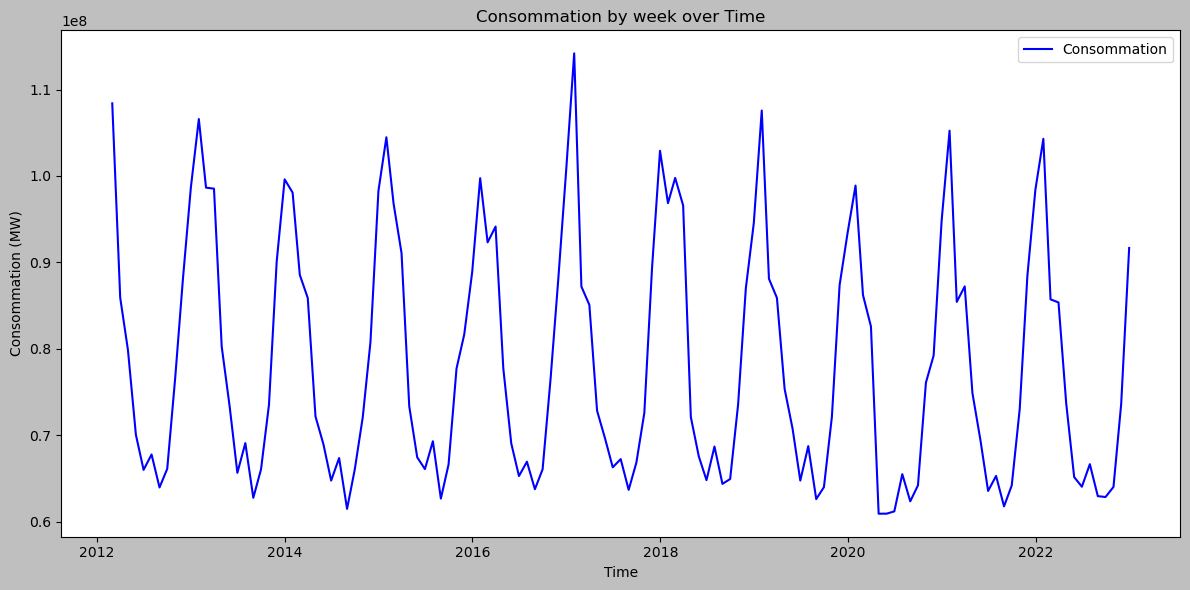

In [78]:
plt.style.use('grayscale')

#plot of the consommation , column = 'consommation' during time 'index : DatetimeIndex'
plt.figure(figsize=(12, 6))
plt.plot(df_resample.index, df_resample['consommation'], label='Consommation', color='blue')
plt.title('Consommation by week over Time')
plt.xlabel('Time')
plt.ylabel('Consommation (MW)')
plt.legend()
plt.tight_layout()


In [67]:
#i want to create a new column 'production global' which is the measumn of the production column 
df_resample['production_global'] = df_resample[['fioul', 'charbon', 'gaz', 'nucleaire', 'eolien', 'solaire', 'hydraulique', 'pompage', 'bioenergies']].sum(axis=1)


/tmp/ipykernel_15716/95917293.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('tab10')  # You can choose other colormaps like 'viridis', 'plasma', etc.


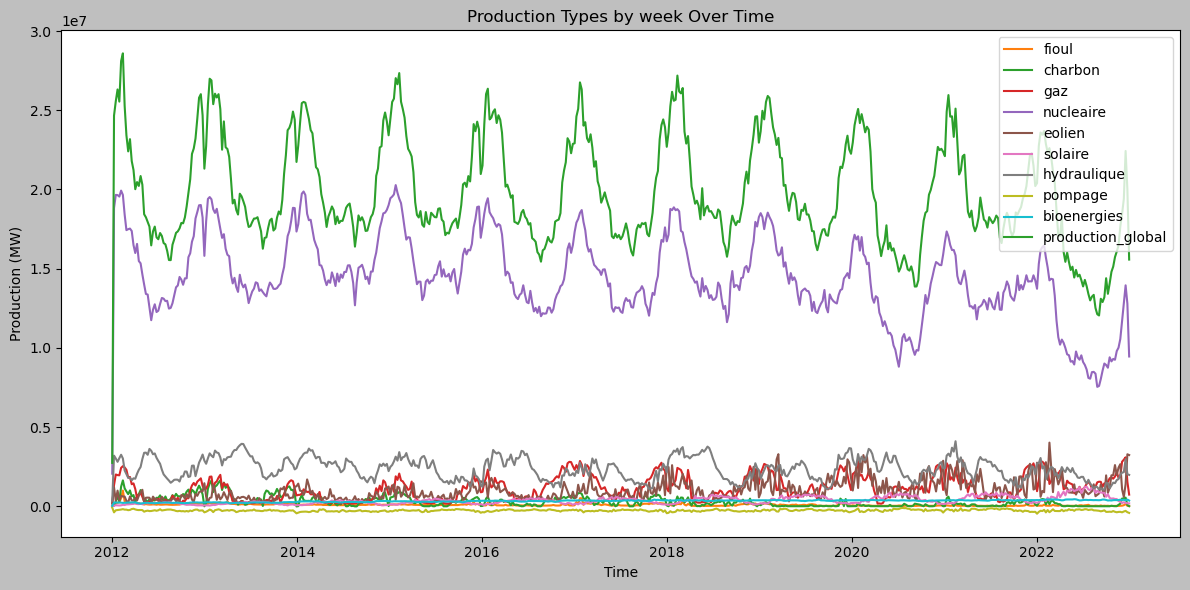

In [68]:
from matplotlib.cm import get_cmap

# Use a colormap for distinct colors
cmap = get_cmap('tab10')  # You can choose other colormaps like 'viridis', 'plasma', etc.
colors = cmap.colors

plt.figure(figsize=(12, 6))
for i, col in enumerate(df_resample.columns):
    if col not in ['consommation', 'ech_physiques', 'taux_co2']:
        plt.plot(df_resample.index, df_resample[col], label=col, color=colors[i % len(colors)])

plt.title('Production Types by week Over Time')
plt.xlabel('Time')
plt.ylabel('Production (MW)')
plt.legend()
plt.tight_layout()
plt.show()

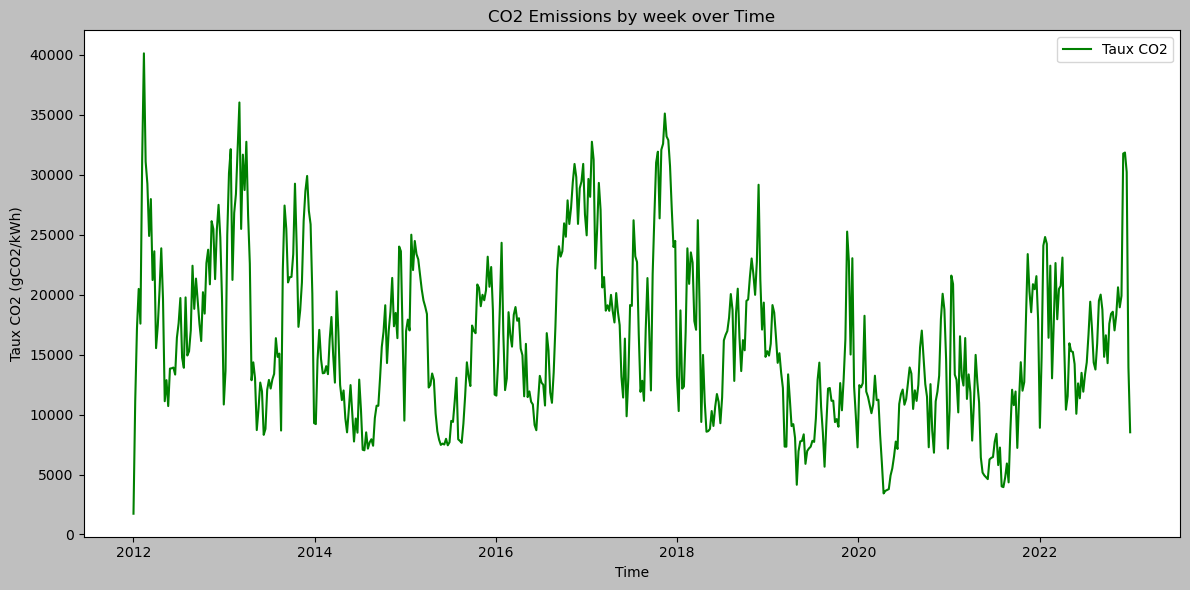

In [69]:
#plot of co2 emissions over time
plt.figure(figsize=(12, 6))
plt.plot(df_resample.index, df_resample['taux_co2'], label='Taux CO2', color='green')
plt.title('CO2 Emissions by week over Time')
plt.xlabel('Time')
plt.ylabel('Taux CO2 (gCO2/kWh)')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
#plot of co2 emissions over time
plt.figure(figsize=(12, 6))
plt.plot(df_resample.index, df_resample['taux_co2'], label='Taux CO2', color='green')
plt.title('CO2 Emissions by week over Time')
plt.xlabel('Time')
plt.ylabel('Taux CO2 (gCO2/kWh)')
plt.legend()
plt.tight_layout()
plt.show()

In [70]:
### Consommation , production et emmissions de CO2 par mois

On va maintenant grouper les données par mois

In [71]:
#group by year and month, then sum the values
df_resample=df.resample('ME').sum(numeric_only=True)
df_resample



,consommation,fioul,charbon,gaz,nucleaire,eolien,solaire,hydraulique,pompage,bioenergies,ech_physiques,taux_co2
date_heure_gmt2,,,,,,,,,,,,
2012-01-31 00:00:00+02:00,101413072.0,892269,1530167,8135663,85434067,3167568,233044,13351730,-1222976,1037785,-11146359.0,75276.0
2012-02-29 00:00:00+02:00,108398087.0,2070689,5113663,9971709,77319366,2243544,404651,10414149,-835933,924113,772061.0,137182.0
2012-03-31 00:00:00+02:00,85924246.0,875642,2927273,6579055,75138288,1949464,665576,7744434,-875693,1080594,-10160449.0,99528.0
2012-04-30 00:00:00+02:00,79899382.0,705657,3298460,2813866,66152813,3137120,614459,10521234,-1027837,820778,-7137200.0,83613.0
2012-05-31 00:00:00+02:00,70077667.0,526000,1706754,1234807,58064275,1944665,851728,15256472,-1293309,943855,-9157565.0,56251.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-30 00:00:00+02:00,62873978.0,150314,20970,6282212,36347308,4574213,3532173,4861958,-1238356,1765193,6662280.0,73796.0
2022-10-31 00:00:00+02:00,64037042.0,103563,61567,7381244,40320840,6996740,2495307,6037953,-1521716,1656227,595865.0,76933.0
2022-11-30 00:00:00+02:00,73644270.0,123288,448622,8680742,43136469,9732757,1604109,7690540,-1527765,1706797,2138803.0,88611.0


Le mois de janvier 2023 n'atant pas complet on va le supprimmer

In [72]:
df_resample = df_resample.drop(df_resample.index[-1])

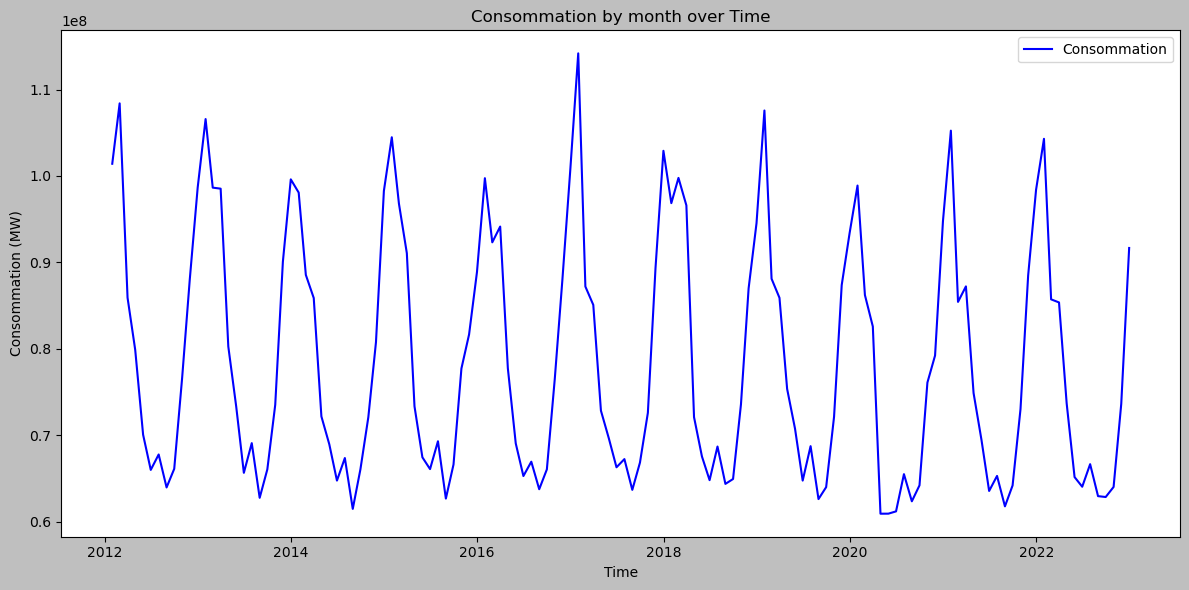

In [73]:
plt.style.use('grayscale')

#plot of the consommation , column = 'consommation' during time 'index : DatetimeIndex'
plt.figure(figsize=(12, 6))
plt.plot(df_resample.index, df_resample['consommation'], label='Consommation', color='blue')
plt.title('Consommation by month over Time')
plt.xlabel('Time')
plt.ylabel('Consommation (MW)')
plt.legend()
plt.tight_layout()


In [74]:
#i want to create a new column 'production global' which is the measumn of the production column 
df_resample['production_global'] = df_resample[['fioul', 'charbon', 'gaz', 'nucleaire', 'eolien', 'solaire', 'hydraulique', 'pompage', 'bioenergies']].sum(axis=1)


/tmp/ipykernel_15716/3412480670.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('tab10')  # You can choose other colormaps like 'viridis', 'plasma', etc.


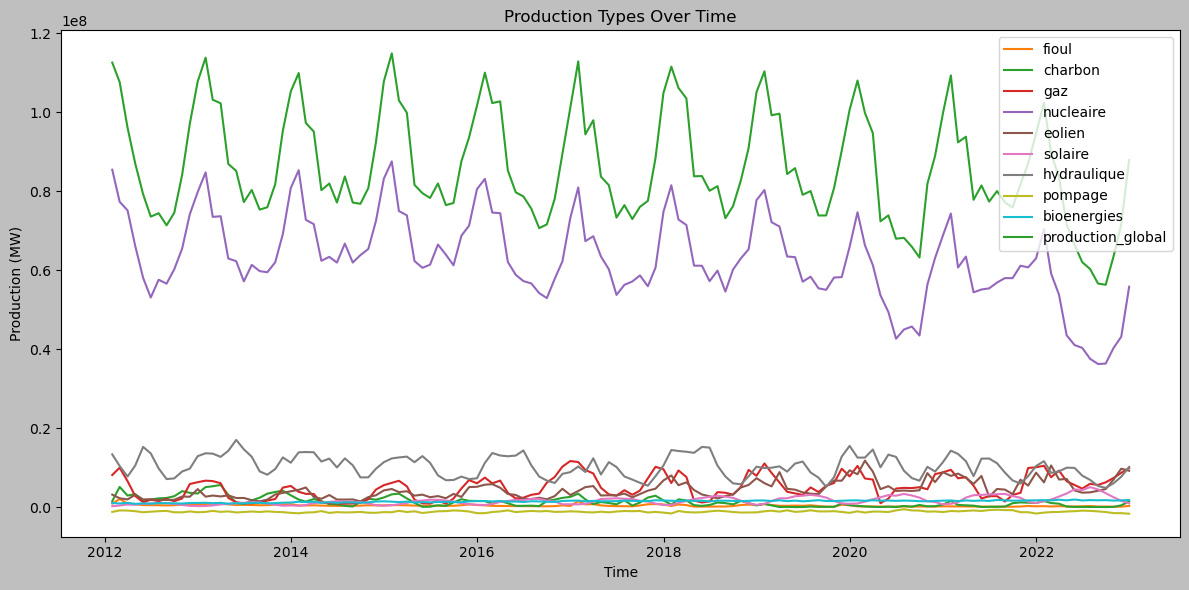

In [75]:
from matplotlib.cm import get_cmap

# Use a colormap for distinct colors
cmap = get_cmap('tab10')  # You can choose other colormaps like 'viridis', 'plasma', etc.
colors = cmap.colors

plt.figure(figsize=(12, 6))
for i, col in enumerate(df_resample.columns):
    if col not in ['consommation', 'ech_physiques', 'taux_co2']:
        plt.plot(df_resample.index, df_resample[col], label=col, color=colors[i % len(colors)])

plt.title('Production Types Over Time')
plt.xlabel('Time')
plt.ylabel('Production (MW)')
plt.legend()
plt.tight_layout()
plt.show()

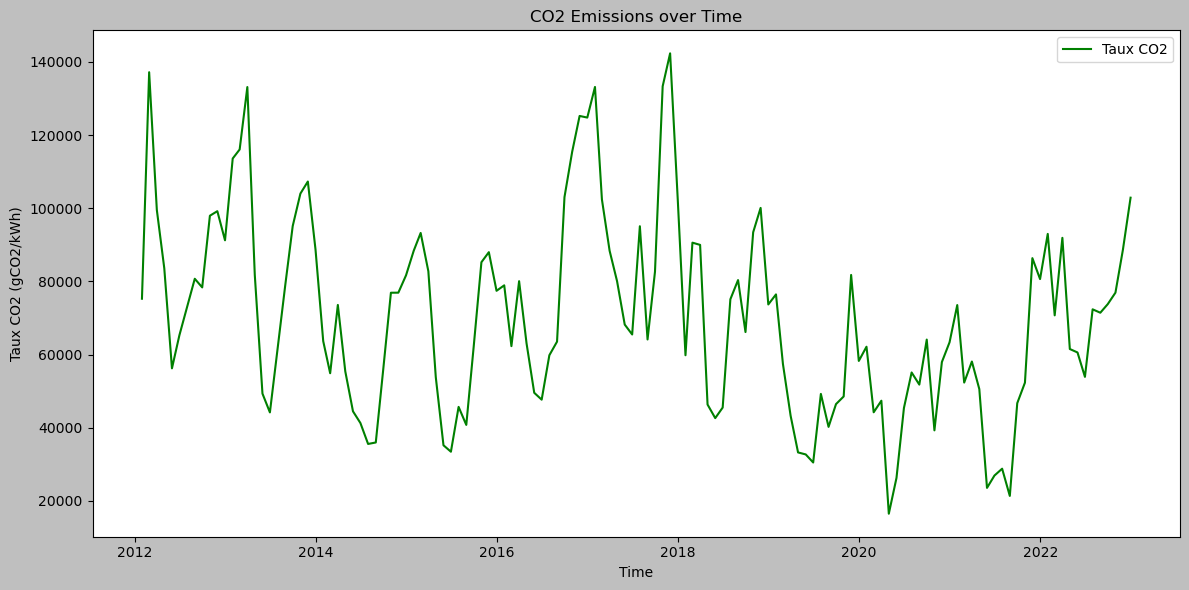

In [76]:
#plot of co2 emissions over time
plt.figure(figsize=(12, 6))
plt.plot(df_resample.index, df_resample['taux_co2'], label='Taux CO2', color='green')
plt.title('CO2 Emissions over Time')
plt.xlabel('Time')
plt.ylabel('Taux CO2 (gCO2/kWh)')
plt.legend()
plt.tight_layout()
plt.show()